<a href="https://colab.research.google.com/github/etemi1/sales_data_analysis-with-python/blob/main/Salary_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [73]:
df = pd.read_csv('/content/Salary_Data.csv')

In [74]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


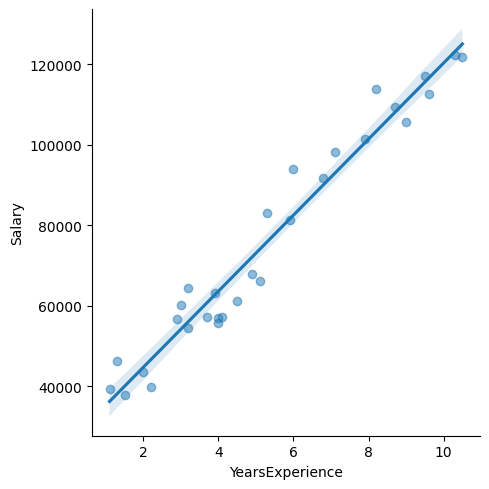

In [76]:
sns.lmplot(x = 'YearsExperience',
           y = 'Salary',
           data= df,
           scatter_kws = {'alpha': 0.5})

In [142]:
X =  np.array(df['YearsExperience']).reshape(-1,1)
y = np.array(df['Salary'])

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [144]:
X_train.shape

(21, 1)

In [145]:
y_train.shape

(21,)

In [146]:
y_test.shape

(9,)

In [147]:
lr = LinearRegression()

In [148]:
lr

LinearRegression()

In [149]:
lr.fit(X_train,y_train)

LinearRegression()

In [150]:
y_pred = lr.predict(X_test)

In [151]:
y_pred.shape

(9,)

In [152]:
lr.coef_

array([9339.08172382])

Text(0.5, 1.0, 'Model Evaluation')

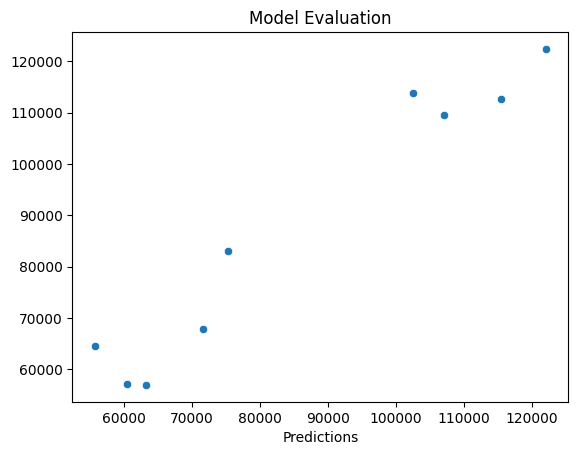

In [159]:
sns.scatterplot(x =y_pred, y = y_test)
plt.xlabel('Predictions')
plt.title ('Model Evaluation')

In [160]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [162]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:',  math.sqrt(mean_squared_error(y_test, y_pred)))

MSE: 37784662.46621314
MAE: 5161.328710400183
RMSE: 6146.92300799458


In [163]:
#residual errors
residuals = y_test - y_pred

In [164]:
residuals

array([-2938.62288352, -3741.93878159, 11313.09152982,  7672.42852889,
        8641.5001489 , -3284.04071301,   280.01990981,  2262.55066791,
       -6317.76523015])

<ipython-input-165-449001059fb5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: ylabel='Density'>

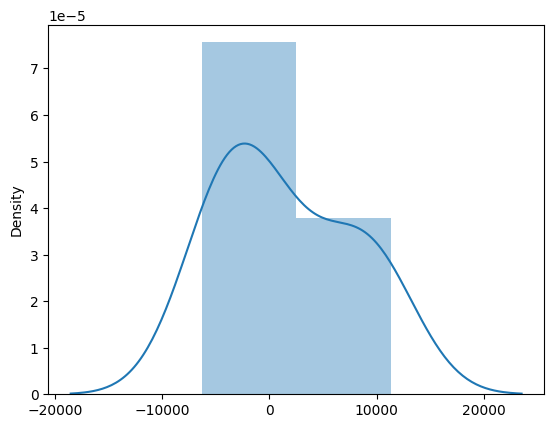

In [165]:
sns.distplot(residuals)

In [168]:
mean_salary = np.mean(df['Salary'])

In [169]:
mean_salary

76003.0

In [170]:
baseline_predictions = np.full_like(df['Salary'], mean_salary)

In [171]:
mae_baseline = mean_absolute_error(df['Salary'], baseline_predictions)
mse_baseline = mean_squared_error(df['Salary'], baseline_predictions)
rmse_baseline = np.sqrt(mse_baseline)

In [172]:
print("Baseline Model:")
print("Mean Absolute Error (MAE):", mae_baseline)
print("Mean Squared Error (MSE):", mse_baseline)
print("Root Mean Squared Error (RMSE):", rmse_baseline)

Baseline Model:
Mean Absolute Error (MAE): 24290.466666666667
Mean Squared Error (MSE): 726499261.7333333
Root Mean Squared Error (RMSE): 26953.65024877583


In [ ]:
# The linear regression model has significantly lower MAE, MSE, and RMSE values compared to the baseline model.
#This indicates that the linear regression model performs better in terms of prediction accuracy
# on the provided dataset. Lower values of these metrics generally suggest better model performance.